Common preprocessing completed.
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step



-------Week 9 Output: --------


ANN Evaluation:
Precision: 0.8846153846153846
Recall: 1.0
F1: 0.9387755102040817
Accuracy: 0.8846153846153846
Model and scaler saved successfully.




-------Week 10 Output: --------


Dataset contains:
- Images: NO
- Text: NO
- Time-series: NO


-------Week 11 Output: --------


Checking for text columns...
Text columns found: ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']


-------Week 13 Output: --------


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with watchdog (inotify)




--------Week 14 Output: ----------




Exception ignored on calling ctypes callback function: <function ExecutionEngine._raw_object_cache_notify at 0x79662b9e7ba0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/llvmlite/binding/executionengine.py", line 178, in _raw_object_cache_notify
    def _raw_object_cache_notify(self, data):

KeyboardInterrupt: 
ExactExplainer explainer: 131it [00:11,  7.74it/s]                         


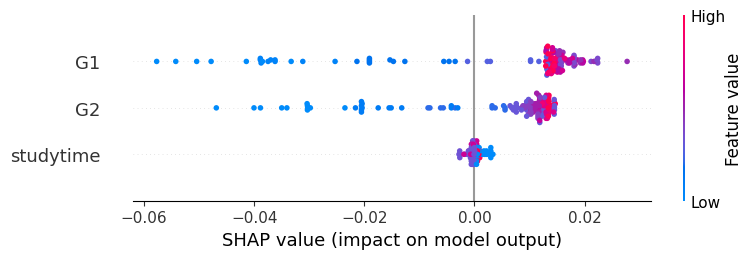

In [9]:
import pandas as pd
import numpy as np
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    confusion_matrix, classification_report,
    precision_score, recall_score, f1_score, accuracy_score
)

import matplotlib.pyplot as plt
# Load dataset
df = pd.read_csv('/content/students.csv', sep=';')

# Create classification target
df['Pass'] = df['G3'].apply(lambda x: 1 if x >= 10 else 0)

# Features (kept consistent across all models)
X = df[['G1', 'G2', 'studytime']]
y = df['Pass']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Common preprocessing completed.")
# -----------------------------
# WEEK 9: ARTIFICIAL NEURAL NETWORK
# -----------------------------
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.layers import Input

ann_model = Sequential([
    Input(shape=(3,)),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

ann_model.add(Dense(8, activation='relu'))
ann_model.add(Dense(1, activation='sigmoid'))

ann_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

ann_model.fit(
    X_train_scaled, y_train,
    epochs=30,
    batch_size=16,
    validation_split=0.2,
    verbose=0
)

y_pred_ann = (ann_model.predict(X_test_scaled) >= 0.5).astype(int)

print("\n-------Week 9 Output: --------\n\n")
print("ANN Evaluation:")
print("Precision:", precision_score(y_test, y_pred_ann))
print("Recall:", recall_score(y_test, y_pred_ann))
print("F1:", f1_score(y_test, y_pred_ann))
print("Accuracy:", accuracy_score(y_test, y_pred_ann))

# Save trained ANN model
ann_model.save("student_ann_model.h5")

# Save scaler
joblib.dump(scaler, "scaler.pkl")

print("Model and scaler saved successfully.")

ann_model = load_model("student_ann_model.h5")
scaler = joblib.load("scaler.pkl")
# week 10
print("\n\n-------Week 10 Output: --------\n\n")
print("Dataset contains:")
print("- Images: NO")
print("- Text: NO")
print("- Time-series: NO")

# week 11
print("\n\n-------Week 11 Output: --------\n\n")
print("Checking for text columns...")
text_columns = df.select_dtypes(include=['object']).columns.tolist()
print("Text columns found:", text_columns)


# WEEK 13: SIMPLE MODEL DEPLOYMENT
# -----------------------------
print("\n\n-------Week 13 Output: --------\n\n")

from flask import Flask, request, jsonify
import numpy as np
import joblib
from tensorflow.keras.models import load_model


app = Flask(__name__)


# Load trained model and scaler
ann_model = load_model("student_ann_model.h5")
scaler = joblib.load("scaler.pkl")


@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json()


    # Extract features
    input_data = np.array([[data['G1'], data['G2'], data['studytime']]])
    input_scaled = scaler.transform(input_data)


    # Prediction
    prediction = ann_model.predict(input_scaled)


    result = "Pass" if prediction[0][0] >= 0.5 else "Fail"


    return jsonify({
        "Prediction": result,
        "Probability": float(prediction[0][0])
    })


# IMPORTANT: run app outside function
if __name__ == "__main__":
    app.run(debug=True)

# -----------------------------
# WEEK 14: MODEL EXPLAINABILITY
# -----------------------------

import shap


print("\n\n-------Week 14 Output: --------\n\n")

# Create explainer (ANN model + training data)
explainer = shap.Explainer(ann_model, X_train_scaled)

# Calculate SHAP values for test data
shap_values = explainer(X_test_scaled)

# Summary plot
shap.summary_plot(
    shap_values, X_test,
    feature_names=X.columns
)



